# Hate Speech Classification

Hate speech is defined by the Cambridge Dictionary as "public speech that expresses hate or encourages violence towards a person or group based on something such as race, religion, sex, or sexual orientation".

Steps to classify hate speech

*    Preprocess the text data
*    Convert text to numerical tokens
*    Build and Train ML
*   Test the Model
*    Save and use it later

Dataset: data.csv


In [1]:
!pip install git+https://github.com/mikelakoju/preprocess_V2_NLP_mikelakoju.git --upgrade --force-reinstall

  Cloning https://github.com/mikelakoju/preprocess_V2_NLP_mikelakoju.git to /tmp/pip-req-build-buw0lylu
  Running command git clone -q https://github.com/mikelakoju/preprocess_V2_NLP_mikelakoju.git /tmp/pip-req-build-buw0lylu
  Created wheel for preprocess-V2-NLP-mikelakoju: filename=preprocess_V2_NLP_mikelakoju-0.1.3-py3-none-any.whl size=12099 sha256=be8dab07cb8e7f68bba4b96ba3b010dd4181a691f5d6ea4d7fa429fad55ea59b
  Stored in directory: /tmp/pip-ephem-wheel-cache-nnp52ybi/wheels/80/88/73/51b2defda4db13f43f02ca2aaa16a2464d99199a2d209304c2
Successfully built preprocess-V2-NLP-mikelakoju


In [2]:
!pip install spacy

In [58]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Dropout
from tensorflow.keras.layers import Conv1D, MaxPool1D, GlobalMaxPooling1D, MaxPooling1D

In [4]:
import numpy as np
import pandas as pd
import re
from sklearn.model_selection import train_test_split
import preprocess_V2_NLP_mikelakoju as ps

In [5]:
df = pd.read_csv("data.csv", index_col= 0)

In [22]:
# Making a Copy of the Original Daat
data = df.copy()

In [23]:
df.head()

,count,hate_speech,offensive_language,neither,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


>###  **class** = class label. :
* `0 - hate speech` 
* `1 - offensive language` 
*  `2 - neither`

In [7]:
df['class'].value_counts()

1    19190
2     4163
0     1430
Name: class, dtype: int64

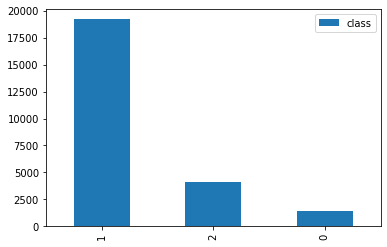

In [11]:
df['class'].value_counts().plot(kind='bar', legend=True, );

> THE DATA IS NOT balanced, so we need to balance it out

In [13]:
vc = df['class'].value_counts()

index = list(vc.index)
count = min(vc.values)

In [18]:
count

1430

In [19]:
df_bal = pd.DataFrame()
for i in index:
  temp = df[df['class']==i].sample(count)
  df_bal = df_bal.append(temp, ignore_index= True)

In [20]:
df_bal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4290 entries, 0 to 4289
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   count               4290 non-null   int64 
 1   hate_speech         4290 non-null   int64 
 2   offensive_language  4290 non-null   int64 
 3   neither             4290 non-null   int64 
 4   class               4290 non-null   int64 
 5   tweet               4290 non-null   object
dtypes: int64(5), object(1)
memory usage: 201.2+ KB


In [24]:
# making df to be df_bal now

df = df_bal.copy()

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4290 entries, 0 to 4289
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   count               4290 non-null   int64 
 1   hate_speech         4290 non-null   int64 
 2   offensive_language  4290 non-null   int64 
 3   neither             4290 non-null   int64 
 4   class               4290 non-null   int64 
 5   tweet               4290 non-null   object
dtypes: int64(5), object(1)
memory usage: 201.2+ KB


# Preprocessing

In [26]:
def get_clean(x):
    x = str(x).lower().replace('\\', '').replace('_', ' ')
    x = ps.cont_exp(x)
    x = ps.remove_emails(x)
    x = ps.remove_urls(x)
    x = ps.remove_html_tags(x)
    x = ps.remove_rt(x)
    x = ps.remove_accented_chars(x)
    x = ps.remove_special_chars(x)
    x = re.sub("(.)\\1{2,}", "\\1", x)
    return x

In [27]:
df['tweet'] = df['tweet'].apply(lambda x: get_clean(x))

In [28]:
df.head()

,count,hate_speech,offensive_language,neither,class,tweet
0,3,0,2,1,1,karma is a bitch the tables will turn even if ...
1,3,0,3,0,1,used to have a girlfriend now all i got is hoe...
2,3,0,3,0,1,haha a private industry birthday is needed to ...
3,3,0,3,0,1,ilove 2pac if youre concerned about how much y...
4,3,0,3,0,1,gucci cut throat use to stay next door his ken...


# Text Tokenization

In [29]:
text = df['tweet'].tolist()

In [31]:
text[:2]

['karma is a bitch the tables will turn even if the person want it to or not you cannot stop it either',
 'used to have a girlfriend now all i got is hoes i was lookin for a good girl but she was fuckin on the low']

In [32]:
token = Tokenizer()
token.fit_on_texts(text)

In [35]:
# to get help of the functionality
#help(token)

In [37]:
# Total vocalbulary Size
len(token.word_counts)

11763

In [39]:
print(token.index_word)

{1: 'a', 2: 'i', 3: 'the', 4: 'you', 5: 'retweet', 6: 'to', 7: 'is', 8: 'bitch', 9: 'and', 10: 'not', 11: 'my', 12: 'that', 13: 'in', 14: 'of', 15: 'it', 16: 'like', 17: 'on', 18: 'be', 19: 'me', 20: 'am', 21: 'this', 22: 'for', 23: 'do', 24: 'trash', 25: 'your', 26: 'out', 27: 'are', 28: 'with', 29: 'ass', 30: 'bitches', 31: 'they', 32: 'all', 33: 'just', 34: 'if', 35: 'so', 36: 'hoes', 37: 'but', 38: 'he', 39: 'fuck', 40: 'get', 41: 'have', 42: 'nigga', 43: 'up', 44: 'when', 45: 'no', 46: 'faggot', 47: 'at', 48: 'was', 49: 'pussy', 50: 'about', 51: 'she', 52: 'what', 53: 'loud', 54: 'laughing', 55: 'these', 56: 'hoe', 57: 'white', 58: 'can', 59: 'got', 60: 'fucking', 61: 'off', 62: 'shit', 63: 'we', 64: 'know', 65: 'as', 66: 'will', 67: 'who', 68: 'youre', 69: 'them', 70: 'go', 71: 'her', 72: 'how', 73: 'niggas', 74: 'one', 75: 'would', 76: 'some', 77: 'people', 78: 'nigger', 79: 'or', 80: 'his', 81: 'bird', 82: 'yankees', 83: 'want', 84: 'now', 85: 'from', 86: 'love', 87: 'an', 88: 

In [40]:
# ´´example to convert this sample text to sequence 
x = ['i love you']

In [41]:
token.texts_to_sequences(x)

[[2, 86, 4]]

In [42]:
vocab_size = len(token.word_counts) + 1 

>  We will not convert our entire text to sequence.. which gives us a list of list. .each list if for is for each sentence

In [45]:
encoded_text = token.texts_to_sequences(text)

In [46]:
print(encoded_text)

[[1708, 7, 1, 8, 3, 3799, 66, 374, 127, 34, 3, 357, 83, 15, 6, 79, 10, 4, 93, 144, 15, 375], [443, 6, 41, 1, 603, 84, 32, 2, 59, 7, 36, 2, 48, 743, 22, 1, 97, 137, 37, 51, 48, 181, 17, 3, 847], [391, 1, 2315, 1340, 270, 7, 1709, 6, 32, 67, 41, 3800, 209, 941, 3, 604, 942, 2, 93, 335, 22, 3801, 2, 103, 4, 943, 54, 26, 53], [3802, 3803, 34, 68, 2316, 50, 72, 185, 25, 518, 263, 91, 12, 7, 76, 8, 62, 6, 19, 9, 4, 124, 25, 3804, 3805], [1341, 444, 605, 288, 6, 336, 247, 1107, 80, 3806, 3807, 8, 3808, 43, 155, 3809, 264], [2317, 3810, 3811, 488, 97, 8, 744], [30, 86, 97, 392, 1342], [5, 3812, 44, 1, 8, 1710, 6, 233, 25, 29], [1711, 663, 2318, 1, 8, 1108, 3813, 3814, 3815, 1712, 176], [5, 3816, 55, 214, 36, 7, 258, 12, 3817, 9, 3818, 2319, 31, 3819, 3820, 3821, 3822], [5, 116, 3823, 55, 36, 18, 1109, 22, 664], [5, 3824, 44, 1, 42, 23, 10, 358, 34, 4, 519, 15, 7, 205, 38, 193, 229, 8, 38, 48, 520, 14, 3825, 289, 665], [5, 3826, 8, 4, 421, 376, 40, 28, 3, 745, 9, 489, 12, 29, 5, 3827, 21, 263, 

* most sentences (tweets)  are not thesame length so we will set a length
* `pad_sequences` : so we pad sentences that are not upto 120 with zero
* `Post`: means that we want the padding to come at the end of the sentence eg(223 33 44 000000)

In [47]:
# most sentences (tweets)  are not thesame length so we will set a length
# so we pad sentences that are not upto 120 with zero
# Post: means that we want the padding to come at the end of the sentence eg(223 33 44 000000)

max_length = 120
X = pad_sequences(encoded_text, maxlen=max_length, padding='post')

In [48]:
print(X)

[[ 1708     7     1 ...     0     0     0]
 [  443     6    41 ...     0     0     0]
 [  391     1  2315 ...     0     0     0]
 ...
 [    3   237    50 ...     0     0     0]
 [   97   392     6 ...     0     0     0]
 [    5 11763  2938 ...     0     0     0]]


In [49]:
X.shape

(4290, 120)

# Model Building

In [57]:
# we need to make our target one-hot encoded
from keras.utils import np_utils

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Max

In [50]:
y = df['class']

In [51]:
y

0       1
1       1
2       1
3       1
4       1
       ..
4285    0
4286    0
4287    0
4288    0
4289    0
Name: class, Length: 4290, dtype: int64

In [53]:
y = np_utils.to_categorical(df['class'])

In [54]:
y

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0, stratify=y)

In [56]:
X_train.shape, X_test.shape

((2874, 120), (1416, 120))

In [64]:
vec_size = 300

model = Sequential()
model.add(Embedding(input_dim = vocab_size, output_dim= vec_size, input_length=max_length))

model.add(Conv1D(32, 2, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(3, activation ='softmax'))

In [60]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 300)          3529200   
_________________________________________________________________
conv1d (Conv1D)              (None, 119, 32)           19232     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 59, 32)            0         
_________________________________________________________________
dropout (Dropout)            (None, 59, 32)            0         
_________________________________________________________________
dense (Dense)                (None, 59, 32)            1056      
_________________________________________________________________
global_max_pooling1d (Global (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 9

In [65]:
#Compile model

model.compile(optimizer=Adam(learning_rate=0.001), loss = 'categorical_crossentropy', metrics=['accuracy'])

#Fit the model
history= model.fit(X_train, y_train, epochs=2, validation_data=(X_test, y_test), shuffle=True)

Epoch 1/2
90/90 [==============================] - 2s 16ms/step - loss: 0.9905 - accuracy: 0.5692 - val_loss: 0.7216 - val_accuracy: 0.7698
Epoch 2/2
90/90 [==============================] - 1s 13ms/step - loss: 0.5426 - accuracy: 0.7965 - val_loss: 0.5187 - val_accuracy: 0.8058


# Model Testing


In [67]:
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

In [71]:
# to predict the classes
y_pred =  np.argmax(model.predict(X_test), axis=-1)

In [72]:
y_pred

array([1, 1, 1, ..., 0, 1, 1])

In [73]:
y_test

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [74]:
# To convert our y_test from one-hot encoded to single classes like the predictions

np.argmax(y_test, axis=-1)

array([0, 0, 0, ..., 0, 1, 1])

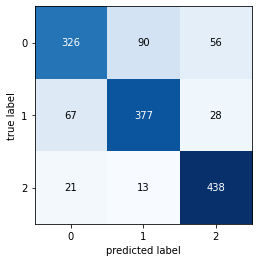

In [76]:
plot_confusion_matrix(confusion_matrix(np.argmax(y_test, axis=-1), y_pred));

In [77]:
print(classification_report(np.argmax(y_test, axis=-1), y_pred))

              precision    recall  f1-score   support

           0       0.79      0.69      0.74       472
           1       0.79      0.80      0.79       472
           2       0.84      0.93      0.88       472

    accuracy                           0.81      1416
   macro avg       0.80      0.81      0.80      1416
weighted avg       0.80      0.81      0.80      1416



# Testing with custom Data

In [97]:
x = 'hey dude whats up'
x1 = 'hey bitch whats up'
x3 = 'You nigger'

In [79]:
# Apply the same transformation we carried out on our training data.. Hence we put it all in a function

def get_encoded(x):
  x = get_clean(x)
  x = token.texts_to_sequences([x])
  x = pad_sequences(x, maxlen=max_length, padding='post')
  return x


In [80]:
get_encoded(x)

array([[283, 282, 351,  43,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0]], dtype=int32)

In [92]:
np.argmax(model.predict(get_encoded(x)), axis=-1)


array([2])

In [84]:
np.argmax(model.predict(get_encoded(x1)), axis=-1)

array([1])

In [88]:
class_labels = {
    0: 'hate speech',
    1: 'offensive language',
    2: 'neither'
}

In [93]:
class_labels[np.argmax(model.predict(get_encoded(x)), axis=-1)[0]]

'neither'

In [94]:
class_labels[np.argmax(model.predict(get_encoded(x1)), axis=-1)[0]]

'offensive language'

In [98]:
class_labels[np.argmax(model.predict(get_encoded(x3)), axis=-1)[0]]

'hate speech'

# Save Model

In [99]:
model.save('model_hate_speech.h5')

In [100]:
import pickle



In [101]:
pickle.dump(token, open('token.pkl', 'wb'))